In [27]:
#importing dependencies

from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#Loading CSV

df = pd.read_csv(os.path.join("Resources", "perth_house_prices.csv"))

df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [7]:
#Selecting Columns of interest

df = df[["SUBURB","BEDROOMS","BATHROOMS","LAND_AREA","FLOOR_AREA","CBD_DIST","NEAREST_SCH_RANK","PRICE"]]
df

,SUBURB,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_SCH_RANK,PRICE
0,South Lake,4,2,600,160,18300,NaN,565000
1,Wandi,3,2,351,139,26900,129.0,365000
2,Camillo,3,1,719,86,22600,113.0,287000
3,Bellevue,2,1,651,59,17900,NaN,255000
4,Lockridge,4,1,466,131,11200,NaN,325000
...,...,...,...,...,...,...,...,...
33651,South Fremantle,4,3,292,245,16100,49.0,1040000
33652,Westminster,3,2,228,114,9600,35.0,410000
33653,Westminster,3,2,261,112,9600,35.0,427000
33654,Girrawheen,3,1,457,85,12600,NaN,295000


In [9]:
#Deleting all empty rows
df = df.dropna()
df

,SUBURB,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_SCH_RANK,PRICE
1,Wandi,3,2,351,139,26900,129.0,365000
2,Camillo,3,1,719,86,22600,113.0,287000
9,Bayswater,3,2,552,126,5900,29.0,685000
11,Butler,3,2,398,158,36300,39.0,367500
13,Hammond Park,4,2,704,247,23100,129.0,535000
...,...,...,...,...,...,...,...,...
33650,South Fremantle,3,2,200,127,16000,128.0,955000
33651,South Fremantle,4,3,292,245,16100,49.0,1040000
33652,Westminster,3,2,228,114,9600,35.0,410000
33653,Westminster,3,2,261,112,9600,35.0,427000


In [10]:
# Prepocessing data

X = df[["SUBURB","BEDROOMS","BATHROOMS","LAND_AREA","FLOOR_AREA","CBD_DIST","NEAREST_SCH_RANK"]]
y = df["PRICE"].values.reshape(-1,1)
print(X.shape, y.shape)

(22704, 7) (22704, 1)


In [11]:
# Creting a copy of data
data = X.copy()

In [13]:
# Creating dummies for SUBURB column

data_binary_encoded = pd.get_dummies(data, columns = ["SUBURB"])
data_binary_encoded

,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_SCH_RANK,SUBURB_Alexander Heights,SUBURB_Alfred Cove,SUBURB_Alkimos,SUBURB_Applecross,...,SUBURB_White Gum Valley,SUBURB_Willagee,SUBURB_Willetton,SUBURB_Wilson,SUBURB_Winthrop,SUBURB_Woodbridge,SUBURB_Woodlands,SUBURB_Woodvale,SUBURB_Wooroloo,SUBURB_Yokine
1,3,2,351,139,26900,129.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,719,86,22600,113.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,2,552,126,5900,29.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,3,2,398,158,36300,39.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,4,2,704,247,23100,129.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33650,3,2,200,127,16000,128.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33651,4,3,292,245,16100,49.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33652,3,2,228,114,9600,35.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33653,3,2,261,112,9600,35.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Splitting data into training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded,y)

In [18]:
# Scaling data

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [19]:
# Transforming Data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [20]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [21]:
# Finding model accuracy using R^2 score

model.score(X_test_scaled, y_test_scaled)

-1.8064348915324712e+22

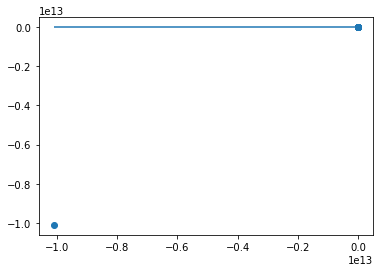

In [25]:
predictions = model.predict(X_test_scaled)

plt.scatter(predictions,predictions - y_test_scaled)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
